In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit

In [63]:
training_history_df = pd.read_csv('training_history.csv')

In [64]:
training_history_df_sorted = training_history_df.sort_values(by='Measured Stimulus')
training_history_df_sorted

,Trial,Truth,Measured Stimulus,Decision,HP
536,537,False,-3.201065,False,1677
1818,1819,False,-2.813667,False,3215
1534,1535,False,-2.813567,False,2932
190,191,False,-2.783284,False,1215
1543,1544,False,-2.667069,False,2944
...,...,...,...,...,...
267,268,True,4.218996,True,1309
701,702,True,4.223197,True,1915
1656,1657,True,4.275449,True,3070
367,368,True,4.296374,True,1461


In [65]:
decision_true = training_history_df[training_history_df['Decision'] == True]['Measured Stimulus']
decision_false = training_history_df[training_history_df['Decision'] == False]['Measured Stimulus']

# Plot the distributions with different colors
sns.histplot(decision_true, kde=True, color='green', label='Decision == True', stat='density', common_norm=False)
sns.histplot(decision_false, kde=True, color='red', label='Decision == False', stat='density', common_norm=False)

# Add labels, legend, and show the plot
plt.xlabel('Measured Stimulus')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Measured Stimulus by Decision')
plt.show()

KeyboardInterrupt: 

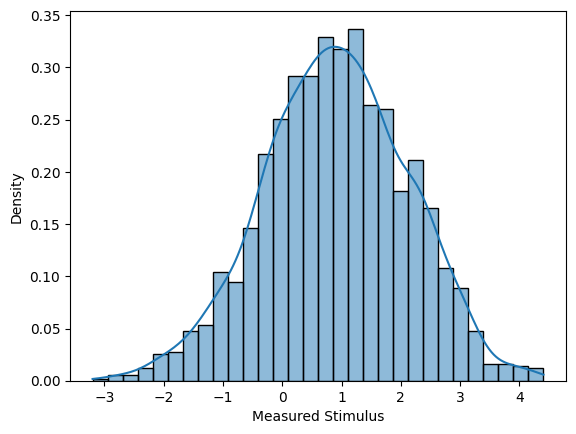

In [ ]:
sns.histplot(training_history_df['Measured Stimulus'], kde=True, stat='density')

plt.xlabel('Measured Stimulus')
plt.ylabel('Density')
plt.show()

In [ ]:
def generate_data_csv(min_stimulus, max_stimulus, step, n_trial, s_ref, s_ref_std, experiment_name):
    data = []  
    stimulus_std_values = np.arange(0.1, 1, 0.1) 

    for stimulus_std in stimulus_std_values: 
        stimulus_values = np.arange(min_stimulus, max_stimulus + step, step)  
        for stimulus in stimulus_values: 
            for trial in range(n_trial):  
                row = [
                    1 + (stimulus - min_stimulus) // step,
                    s_ref,
                    s_ref_std,
                    stimulus,
                    stimulus_std
                ]
                data.append(row)

    filename = f"{experiment_name}.csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Trial', 'Stimulus 1 Value', 'Stimulus 1 Std', 'Stimulus 2 Value', 'Stimulus 2 Std'])
        writer.writerows(data)
    
    print(f"Data successfully written to {filename}")


In [ ]:
experiment_name = "decreasing_sensitivity"
generate_data_csv(
    min_stimulus = -3.7,
    max_stimulus = 4.6,
    step = 0.1,
    n_trial = 10,
    s_ref = 2,
    s_ref_std = 0.5,
    experiment_name=experiment_name
)

Data successfully written to  decreasing_sensitivity.csv


In [ ]:
# decreasing_sensitivity_result = pd.read_csv('experiment_results.csv')
decreasing_sensitivity_result = pd.read_csv('decreasing_sensitivity_result.csv')

In [ ]:
decreasing_sensitivity_result.to_csv('decreasing_sensitivity_result.csv')

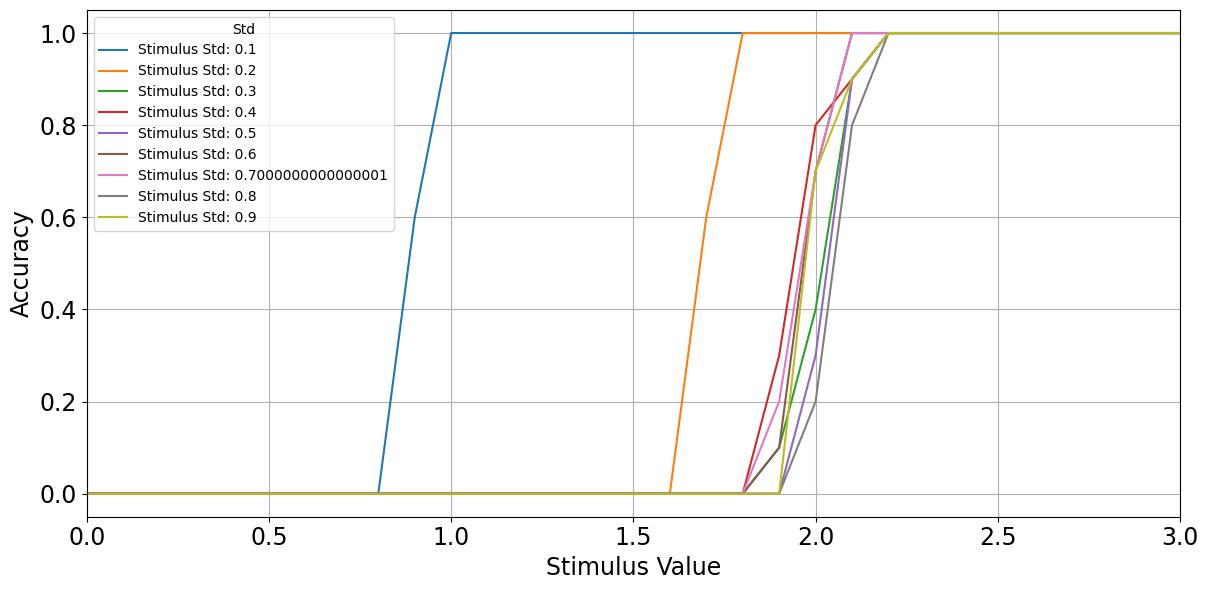

In [70]:
accuracy_df = (
    decreasing_sensitivity_result
    .groupby(['Stimulus 2 Std', 'Stimulus 2 Value'])['Comparison Result']
    .apply(lambda x:1- x.sum() / len(x)) 
    .reset_index()
    .rename(columns={'Comparison Result': 'Accuracy'})
)

plt.figure(figsize=(12, 6))

for stimulus_std, grouped_df in accuracy_df.groupby('Stimulus 2 Std'):
    plt.plot(
        grouped_df['Stimulus 2 Value'],
        grouped_df['Accuracy'],
        marker= None,
        label=f"Stimulus Std: {stimulus_std}",
        linestyle='-'
    )

plt.xlabel("Stimulus Value", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(title="Std")
plt.grid(True)
plt.tight_layout()
plt.xlim([0,3])

plt.show()


C:\Users\aslan\AppData\Local\Temp\ipykernel_2600\846894766.py:6: RuntimeWarning: overflow encountered in exp
  return a / (1.0 + np.exp(-c * (x - d))) + b


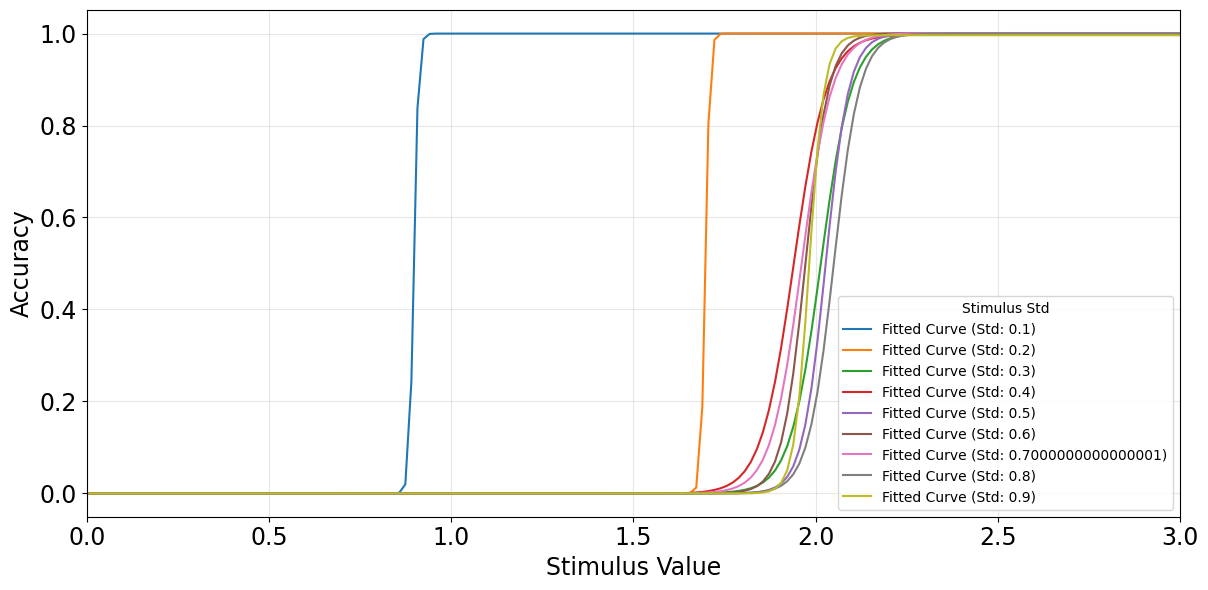

In [71]:
def sigmoid(x, a, b, c, d):
    """
    General sigmoid function:
    y = a / (1 + exp(-c * (x - d))) + b
    """
    return a / (1.0 + np.exp(-c * (x - d))) + b

plt.figure(figsize=(12, 6))

for stimulus_std, grouped_df in accuracy_df.groupby('Stimulus 2 Std'):
    x_data = grouped_df['Stimulus 2 Value'].values
    y_data = grouped_df['Accuracy'].values
    
    initial_guess = [1.0, 0.0, 10.0, np.median(x_data)]  # Adjust growth rate 'c' for steep curves
    popt, _ = curve_fit(sigmoid, x_data, y_data, p0=initial_guess, maxfev=10000)
    
    x_smooth = np.linspace(min(x_data), max(x_data), 500)  # Increased to 500 points for smoothness
    
    y_smooth = sigmoid(x_smooth, *popt)
    
    plt.plot(
        x_smooth, y_smooth,
        linestyle='-',  # Line style for fitted sigmoid curve
        label=f"Fitted Curve (Std: {stimulus_std})"
    )

plt.xlabel("Stimulus Value", fontsize=17)
plt.ylabel("Accuracy", fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(title="Stimulus Std", fontsize=10)
plt.grid(True, alpha=0.3)  # Slight transparency for gridlines
plt.tight_layout()
plt.xlim([0, 3])  # Adjust x-axis limits to your required range

plt.show()


In [72]:
def generate_data_csv(min_stimulus, max_stimulus, step, n_trial, s_ref, s_ref_std, experiment_name):
    data = []  
    stimulus_std_values = np.arange(0.1, 1, 0.1) 

    for stimulus_std in stimulus_std_values: 
        stimulus_values = np.arange(min_stimulus, max_stimulus + step, step)  
        for stimulus in stimulus_values: 
            for trial in range(n_trial):  
                row = [
                    1 + (stimulus - min_stimulus) // step,
                    s_ref,
                    s_ref_std,
                    stimulus,
                    stimulus_std
                ]
                data.append(row)

    filename = f"{experiment_name}.csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Trial', 'Stimulus 1 Value', 'Stimulus 1 Std', 'Stimulus 2 Value', 'Stimulus 2 Std'])
        writer.writerows(data)
    
    print(f"Data successfully written to {filename}")


In [73]:
experiment_name = "add_bias"
generate_data_csv(
    min_stimulus = -3.7,
    max_stimulus = 4.6,
    step = 0.1,
    n_trial = 10,
    s_ref = 2,
    s_ref_std = 0.5,
    experiment_name=experiment_name
)

Data successfully written to add_bias.csv


In [ ]:
# add_bias_result = pd.read_csv('experiment_results.csv')
add_bias_result = pd.read_csv('decreasing_sensitivity_result.csv')

In [76]:
add_bias_result.to_csv('add_bias_result.csv')

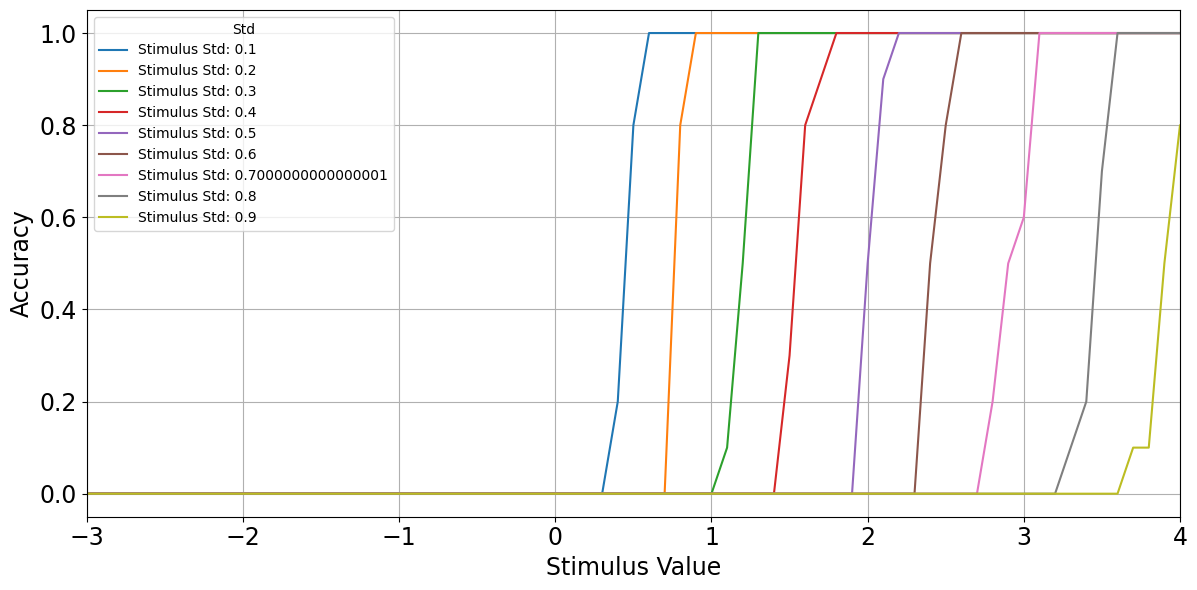

In [80]:
accuracy_df = (
    add_bias_result
    .groupby(['Stimulus 2 Std', 'Stimulus 2 Value'])['Comparison Result']
    .apply(lambda x:1- x.sum() / len(x)) 
    .reset_index()
    .rename(columns={'Comparison Result': 'Accuracy'})
)

plt.figure(figsize=(12, 6))

for stimulus_std, grouped_df in accuracy_df.groupby('Stimulus 2 Std'):
    plt.plot(
        grouped_df['Stimulus 2 Value'],
        grouped_df['Accuracy'],
        marker= None,
        label=f"Stimulus Std: {stimulus_std}",
        linestyle='-'
    )

plt.xlabel("Stimulus Value", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.legend(title="Std")
plt.grid(True)
plt.tight_layout()
plt.xlim([-3,4])

plt.show()


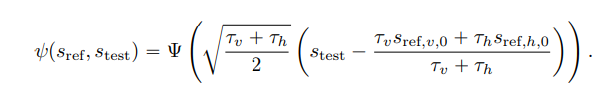

C:\Users\aslan\AppData\Local\Temp\ipykernel_2600\3425794763.py:6: RuntimeWarning: overflow encountered in exp
  return a / (1.0 + np.exp(-c * (x - d))) + b


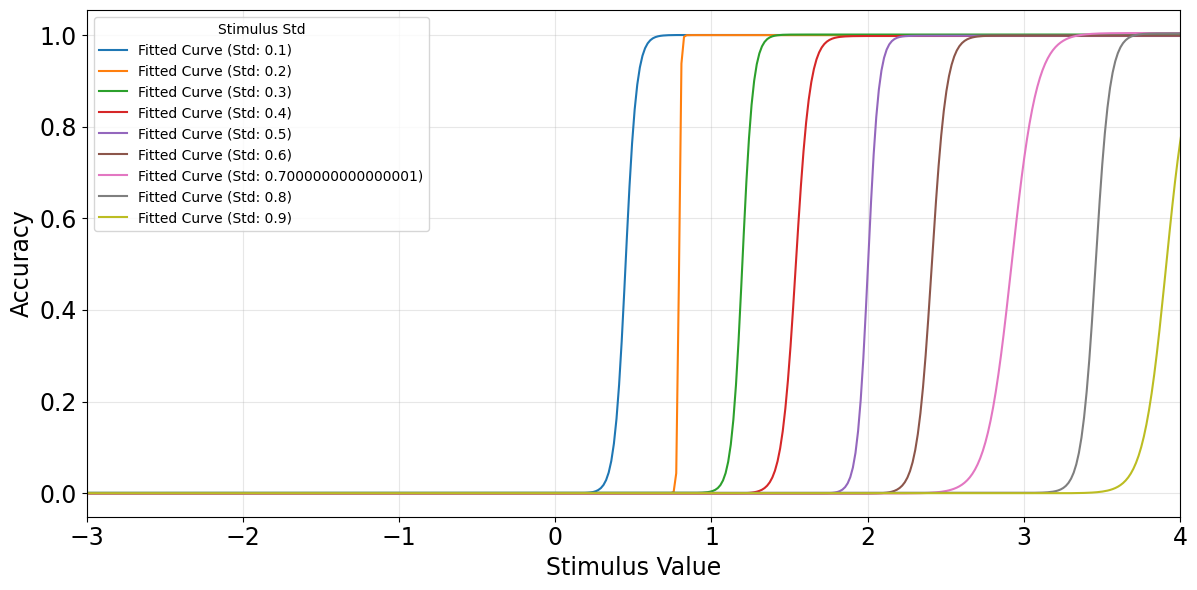

In [83]:
def sigmoid(x, a, b, c, d):
    """
    General sigmoid function:
    y = a / (1 + exp(-c * (x - d))) + b
    """
    return a / (1.0 + np.exp(-c * (x - d))) + b

plt.figure(figsize=(12, 6))

for stimulus_std, grouped_df in accuracy_df.groupby('Stimulus 2 Std'):
    x_data = grouped_df['Stimulus 2 Value'].values
    y_data = grouped_df['Accuracy'].values
    
    initial_guess = [1.0, 0.0, 10.0, np.median(x_data)]  # Adjust growth rate 'c' for steep curves
    popt, _ = curve_fit(sigmoid, x_data, y_data, p0=initial_guess, maxfev=10000)
    
    x_smooth = np.linspace(min(x_data), max(x_data), 500)  # Increased to 500 points for smoothness
    
    y_smooth = sigmoid(x_smooth, *popt)
    
    plt.plot(
        x_smooth, y_smooth,
        linestyle='-',  # Line style for fitted sigmoid curve
        label=f"Fitted Curve (Std: {stimulus_std})"
    )

plt.xlabel("Stimulus Value", fontsize=17)
plt.ylabel("Accuracy", fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(title="Stimulus Std", fontsize=10)
plt.grid(True, alpha=0.3)  # Slight transparency for gridlines
plt.tight_layout()
plt.xlim([-3, 4])  # Adjust x-axis limits to your required range

plt.show()
